## Mounting Google Drive
This step connects your Google Drive to the Colab environment, allowing access to files stored in your Drive. This is essential if your dataset or code files are saved on Google Drive.


In [ ]:
# Importing the necessary module to mount Google Drive
from google.colab import drive

# Mounting Google Drive to access files
drive.mount('/content/drive')  # This will prompt you to authenticate your Google account


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing Libraries
In this section, we import the essential libraries required for the project. Each library serves a specific purpose:

- **Numpy**: Used for numerical operations and handling arrays.
- **Pandas**: Used for data manipulation and analysis.
- **Seaborn**: For creating advanced statistical data visualizations.
- **Matplotlib.pyplot**: For basic plotting and visualizations.
- **Plotly.express**: For interactive and dynamic visualizations.
- **Scikit-learn (KNNImputer)**: Used to handle missing data using the k-nearest neighbors algorithm.
- **Warnings**: To suppress unnecessary warnings for a cleaner output.



In [ ]:
# Importing libraries for data manipulation and visualization
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and DataFrame operations

# Visualization libraries
import seaborn as sns  # For static statistical plots
import matplotlib.pyplot as plt  # For basic static plots
import plotly.express as px  # For interactive visualizations

# Library for handling missing data
from sklearn.impute import KNNImputer  # KNN-based missing value imputation

# Suppressing warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')  # Ignores deprecation and runtime warnings


## Loading Datasets
In this section, we load multiple datasets related to food supply and dietary data. The datasets are stored in Google Drive, and we use their file paths to read them into Pandas DataFrames.

### Datasets:
1. **Food Supply Data**: Contains information about food supply measured in kcal.
2. **Fat Supply Data**: Contains data on fat supply quantity.
3. **Protein Supply Data**: Contains data on protein supply quantity.
4. **Food Data Descriptions**: Provides descriptions of the datasets.

### Key Steps:
- **Reading CSV Files**: The `pd.read_csv()` function is used to load data from CSV files.
- **Dropping Unnecessary Columns**: The `Unit (all except Population)` column is removed as it does not contribute to the analysis.


In [ ]:
# Define the path to the dataset folder in Google Drive
path = '../content/drive/My Drive/Colab Notebooks/covid19-healthy-diet-dataset/'

# Load Food Supply dataset and drop the 'Unit (all except Population)' column
food = pd.read_csv(path + 'Food_Supply_kcal_Data.csv').drop(['Unit (all except Population)'], axis=1)
print("Food Supply dataset loaded successfully!")

# Load Fat Supply dataset and drop the 'Unit (all except Population)' column
fat = pd.read_csv(path + 'Fat_Supply_Quantity_Data.csv').drop(['Unit (all except Population)'], axis=1)
print("Fat Supply dataset loaded successfully!")

# Load Protein Supply dataset and drop the 'Unit (all except Population)' column
protein = pd.read_csv(path + 'Protein_Supply_Quantity_Data.csv').drop(['Unit (all except Population)'], axis=1)
print("Protein Supply dataset loaded successfully!")

# Load Food Data Descriptions dataset
desc = pd.read_csv(path + 'Supply_Food_Data_Descriptions.csv')
print("Food Data Descriptions dataset loaded successfully!")


Food Supply dataset loaded successfully!
Fat Supply dataset loaded successfully!
Protein Supply dataset loaded successfully!
Food Data Descriptions dataset loaded successfully!


## Inspecting the Food Dataset
In this step, we use the `info()` method to get an overview of the Food Supply dataset. This includes:

1. The number of rows and columns.
2. Column names and their respective data types.
3. The count of non-null values in each column.
4. Memory usage of the dataset.

This inspection helps in understanding the structure of the data and identifying potential issues such as missing values or incorrect data types.


In [ ]:
# Displaying information about the Food dataset
food.info()  # Provides details about columns, data types, and non-null values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   170 non-null    object 
 1   Alcoholic Beverages       170 non-null    float64
 2   Animal Products           170 non-null    float64
 3   Animal fats               170 non-null    float64
 4   Aquatic Products, Other   170 non-null    float64
 5   Cereals - Excluding Beer  170 non-null    float64
 6   Eggs                      170 non-null    float64
 7   Fish, Seafood             170 non-null    float64
 8   Fruits - Excluding Wine   170 non-null    float64
 9   Meat                      170 non-null    float64
 10  Milk - Excluding Butter   170 non-null    float64
 11  Miscellaneous             170 non-null    float64
 12  Offals                    170 non-null    float64
 13  Oilcrops                  170 non-null    float64
 14  Pulses    

## Exploring the 'Undernourished' Column
The `Undernourished` column likely contains information about the prevalence of undernourishment in different regions or populations. By using the `unique()` method, we can identify all distinct values present in this column.

### Why Check Unique Values?
- To understand the range or categories of data in the column.
- To identify potential issues such as missing values (e.g., `NaN`) or inconsistent entries (e.g., `'Unknown'`, `'-'`).


In [ ]:
# Displaying unique values in the 'Undernourished' column
unique_values = food["Undernourished"].unique()  # Fetch unique entries in the column
print("Unique values in the 'Undernourished' column:")
print(unique_values)


Unique values in the 'Undernourished' column:
['29.8' '6.2' '3.9' '25' nan '4.6' '4.3' '<2.5' '14.7' '7.5' '10.1' '17.1'
 '26.4' '3.6' '20' '12.6' '16.4' '9.9' '59.6' '37.5' '2.7' '8.5' '4.8'
 '40.3' '19' '5.6' '18.9' '9.5' '7.9' '4.5' '9' '2.9' '20.6' '3.7' '4.2'
 '10.5' '10.2' '5.5' '15.2' '16.5' '28' '8.1' '49.3' '12.9' '14.5' '8.3'
 '4.9' '29' '8' '12.2' '29.4' '47.8' '2.8' '7.1' '11' '13.1' '37.2' '44.4'
 '17.5' '2.5' '10.3' '6.3' '10.4' '6.5' '13.4' '3.4' '27.9' '10.6' '27.3'
 '8.7' '17' '3.2' '6.8' '20.3' '10' '10.7' '9.7' '13.3' '36.8' '5.7' '7'
 '11.3' '25.6' '8.9' '20.1' '3.5' '7.8' '24.9' '16.1' '5.4' '41' '2.6'
 '30.7' '7.2' '21.2' '9.3' '38.9' '46.7' '51.3']


## Cleaning the 'Undernourished' Column
The 'Undernourished' column contains a special value `'<2.5'` that represents a specific range. To make this column usable for analysis:

1. We replace `'<2.5'` with `1.0`, assuming it represents a numeric estimate.
2. Convert the entire column to the `float64` data type for consistency and easier computations.

This cleaning process is applied to the 'Undernourished' column in all three datasets: `fat`, `food`, and `protein`.

Finally, we inspect the `protein` dataset using the `info()` method to ensure the changes are reflected and verify the data structure.


In [ ]:
# Clean the 'Undernourished' column in the fat dataset
fat['Undernourished'] = fat['Undernourished'].map(lambda x: '1.0' if x == '<2.5' else x).astype('float64')

# Clean the 'Undernourished' column in the food dataset
food['Undernourished'] = food['Undernourished'].map(lambda x: '1.0' if x == '<2.5' else x).astype('float64')

# Clean the 'Undernourished' column in the protein dataset
protein['Undernourished'] = protein['Undernourished'].map(lambda x: '1.0' if x == '<2.5' else x).astype('float64')

# Display dataset information to verify changes in the protein dataset
protein.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   170 non-null    object 
 1   Alcoholic Beverages       170 non-null    float64
 2   Animal Products           170 non-null    float64
 3   Animal fats               170 non-null    float64
 4   Aquatic Products, Other   170 non-null    float64
 5   Cereals - Excluding Beer  170 non-null    float64
 6   Eggs                      170 non-null    float64
 7   Fish, Seafood             170 non-null    float64
 8   Fruits - Excluding Wine   170 non-null    float64
 9   Meat                      170 non-null    float64
 10  Milk - Excluding Butter   170 non-null    float64
 11  Offals                    170 non-null    float64
 12  Oilcrops                  170 non-null    float64
 13  Pulses                    170 non-null    float64
 14  Spices    

## Checking for Missing Values in the Food Dataset
In this step, we use the `isnull().sum()` method to check for any missing values (NaN) in the `food` dataset. This is important for identifying which columns have incomplete data, which may require handling before further analysis or modeling.

### Why Check Missing Values?
- To identify columns that may need imputation or removal.
- To ensure that missing data doesn't affect the accuracy or integrity of analysis and modeling.


In [ ]:
# Checking for missing values in the 'food' dataset
print("Missing values in the Food dataset:")
print(food.isnull().sum())  # Displays the count of missing values in each column


Missing values in the Food dataset:
Country                     0
Alcoholic Beverages         0
Animal Products             0
Animal fats                 0
Aquatic Products, Other     0
Cereals - Excluding Beer    0
Eggs                        0
Fish, Seafood               0
Fruits - Excluding Wine     0
Meat                        0
Milk - Excluding Butter     0
Miscellaneous               0
Offals                      0
Oilcrops                    0
Pulses                      0
Spices                      0
Starchy Roots               0
Stimulants                  0
Sugar Crops                 0
Sugar & Sweeteners          0
Treenuts                    0
Vegetal Products            0
Vegetable Oils              0
Vegetables                  0
Obesity                     3
Undernourished              7
Confirmed                   6
Deaths                      6
Recovered                   6
Active                      8
Population                  0
dtype: int64


## Identifying Columns with Missing Values in the Fat Dataset
In this step, we use a list comprehension to identify columns in the `fat` dataset that have missing values. This helps us pinpoint which specific columns need attention (e.g., imputation or removal).

### Why Identify Columns with Missing Values?
- To focus on the columns that require cleaning before performing analysis or modeling.
- To decide whether to drop, fill, or otherwise handle the missing values in each column.


In [ ]:
# List comprehension to identify columns with missing values in the 'fat' dataset
mis_col = [c for c in fat.columns if fat[c].isnull().sum() != 0]

# Displaying the columns that have missing values
mis_col


['Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered', 'Active']

## Handling Missing Values by Imputation
In this section, we fill missing values (NaN) in the identified columns with the mean of each respective column. The imputation is performed across the `fat`, `food`, and `protein` datasets for the columns with missing data.

### Why Use Mean Imputation?
- **Mean Imputation**: Replaces missing values with the mean of the non-missing values in the column. This is a common method for numerical data where missing values are assumed to be random and not biased.
- **Why Apply to Multiple Datasets?**: Since the same columns exist across the three datasets (`fat`, `food`, `protein`), we apply the same imputation method to all of them to ensure consistency.


In [ ]:
# Iterate through the columns with missing values and apply mean imputation
for col in mis_col:
    # Fill missing values in the 'fat' dataset with the mean of each column
    fat[col] = fat[col].fillna(fat[col].mean())

    # Fill missing values in the 'food' dataset with the mean of each column
    food[col] = food[col].fillna(food[col].mean())

    # Fill missing values in the 'protein' dataset with the mean of each column
    protein[col] = protein[col].fillna(protein[col].mean())

# Checking if any missing values remain in the 'food' dataset
print("Missing values in the 'food' dataset after imputation:")
print(food.isnull().sum())  # Display the count of missing values in each column


Missing values in the 'food' dataset after imputation:
Country                     0
Alcoholic Beverages         0
Animal Products             0
Animal fats                 0
Aquatic Products, Other     0
Cereals - Excluding Beer    0
Eggs                        0
Fish, Seafood               0
Fruits - Excluding Wine     0
Meat                        0
Milk - Excluding Butter     0
Miscellaneous               0
Offals                      0
Oilcrops                    0
Pulses                      0
Spices                      0
Starchy Roots               0
Stimulants                  0
Sugar Crops                 0
Sugar & Sweeteners          0
Treenuts                    0
Vegetal Products            0
Vegetable Oils              0
Vegetables                  0
Obesity                     0
Undernourished              0
Confirmed                   0
Deaths                      0
Recovered                   0
Active                      0
Population                  0
dtype: int64


## Creating a Scatter Plot with Plotly
In this step, we create an interactive scatter plot to visualize the relationship between the number of confirmed COVID-19 cases (`Confirmed`) and the number of deaths (`Deaths`).

### Key Plotly Features:
- **`x` and `y`**: Define the axes of the plot (Confirmed vs Deaths).
- **`size`**: Controls the size of the data points based on the `Active` cases, providing insight into active cases' proportion.
- **`hover_name`**: Displays the country name when hovering over a data point for easy identification.
- **`log_x`**: Applies a logarithmic scale to the x-axis to better visualize large values.
- **`trendline`**: Adds an Ordinary Least Squares (OLS) regression line to show the general trend of the data.
- **`marginal_x` and `marginal_y`**: Adds additional visualizations along the x and y axes (boxplot and violin plot) to examine distributions.
- **`template`**: Specifies the visual theme of the plot (simple white theme in this case).


In [ ]:
# Create an interactive scatter plot with Plotly
fig = px.scatter(
    food,                     # Dataset to use (food)
    x="Confirmed",             # X-axis: Number of confirmed cases
    y="Deaths",                # Y-axis: Number of deaths
    size="Active",             # Size of points: Number of active cases
    hover_name='Country',      # Country name shown when hovering
    log_x=False,               # Do not use logarithmic scale for x-axis
    size_max=30,               # Maximum size of points in the plot
    trendline="ols",           # Add Ordinary Least Squares (OLS) regression line
    marginal_x="box",          # Add a boxplot to the x-axis to visualize distribution
    marginal_y="violin",       # Add a violin plot to the y-axis to visualize distribution
    template="simple_white"    # Use simple white theme for plot aesthetics
)

# Show the plot
fig.show()


## Adding the 'Animal Products' and 'Vegetal Products' Columns
In this step, we add the values of the 'Animal Products' and 'Vegetal Products' columns together to create a combined measure, which can be useful for understanding the total supply of food in the respective categories.

### Why Combine These Columns?
- To get a comprehensive view of the total food supply across both animal and vegetal products.
- This combined value might be used for further analysis, such as exploring overall food security or comparing it with other metrics (e.g., undernourishment or population).


In [ ]:
# Add the values of 'Animal Products' and 'Vegetal Products' columns together
combined_food_supply = food['Animal Products'] + food['Vegetal Products']

# Display the combined result
combined_food_supply.head()  # View the first few values of the combined column


,0
0,50.0250
1,50.0000
2,50.0075
3,50.0111
4,49.9897


## Summing Selected Columns Across Rows
In this step, we are summing the values of specific columns from the `food` dataset. The `iloc[:, 1:24]` part of the code selects the columns from index 1 to 23 (Python indexing starts from 0).

### Why Sum These Columns?
- The operation sums the values for each row across the selected columns, which can be useful for calculating the total supply of various food categories (assuming the columns represent food supply data).
- This helps in analyzing the overall food supply per row (e.g., per country or region), and it can also be used to detect outliers or anomalies in the dataset.

### Formula:
For each row, we sum the values from columns 1 to 23:
\[
\text{Total} = \sum_{i=1}^{23} \text{Column i}
\]


In [ ]:
# Sum values from columns 1 to 23 across each row in the 'food' dataset
total_food_supply = food.iloc[:, 1:24].sum(axis=1)

# Display the summed values for the first few rows
total_food_supply.head()


,0
0,100.0002
1,100.0002
2,100.0001
3,100.0003
4,100.0000


## Scaling Food Supply Data by a Factor of 2
In this step, we are multiplying the values of selected columns from the `food` dataset by 2. The `iloc[:, 1:24]` part selects columns from index 1 to 23.

### Why Multiply by 2?
- This operation can be used to simulate changes in food supply or to scale the values for any reason (e.g., modeling a scenario where food supply increases or to adjust units).
- It’s often used in scenarios where you need to adjust data for comparison, normalization, or to reflect projections.

### Formula:
Each value in the selected columns is m


In [ ]:
# Multiply the values in columns 1 to 23 by 2 to scale them
food.iloc[:, 1:24] = food.iloc[:, 1:24] * 2

# Display the first few rows to check if the values have been correctly scaled
food.head()


,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
0,Afghanistan,0.0000,9.5548,1.7008,0.0,74.2372,0.3002,0.0000,2.9514,2.4012,...,90.4952,4.6024,1.5008,4.5,29.80000,0.142134,0.006186,0.123374,0.012574,38928000.0
1,Albania,1.8240,32.1860,2.1182,0.0,32.4214,1.6182,0.2942,7.7964,7.7376,...,67.8140,5.6488,5.5016,22.3,6.20000,2.967301,0.050951,1.792636,1.123714,2838000.0
2,Algeria,0.1792,12.0652,0.3882,0.0,50.0224,0.8362,0.2390,6.3610,2.5086,...,87.9498,11.5276,4.0914,26.6,3.90000,0.244897,0.006558,0.167572,0.070767,44357000.0
3,Angola,3.8776,9.3854,0.5288,0.0,36.7042,0.0882,1.6744,4.6266,5.8604,...,90.6368,8.5482,0.7050,6.8,25.00000,0.061687,0.001461,0.056808,0.003419,32522000.0
4,Antigua and Barbuda,4.6082,30.7344,3.0858,0.0,27.4430,0.4114,3.4560,7.3648,14.0712,...,69.2450,9.3808,2.5920,19.1,10.82454,0.293878,0.007143,0.190816,0.095918,98000.0


## Rounding the Combined 'Animal Products' and 'Vegetal Products' Values
In this step, we are summing the values of the 'Animal Products' and 'Vegetal Products' columns and rounding the result to one decimal place.

### Why Round the Values?
- **Rounding** helps in reducing the precision of the data to a desired level, making it easier to analyze or present.
- This is useful when working with large datasets where too many decimal places are unnecessary, or when you want to standardize the values to a more readable format.

### Formula:
For each row, we sum the values from the two columns and round the result to one decimal place:
\[
\text{Rounded Sum} = \text{round}(\text{Animal Products} + \text{Vegetal Products}, 1)
\]


In [ ]:
# Sum the 'Animal Products' and 'Vegetal Products' columns, then round the result to 1 decimal place
rounded_combined_food_supply = (food['Animal Products'] + food['Vegetal Products']).round(1)

# Display the rounded result for the first few rows
rounded_combined_food_supply.head()


,0
0,100.0
1,100.0
2,100.0
3,100.0
4,100.0


## Calculating the Mean of the Combined 'Animal Products' and 'Vegetal Products' Values
In this step, we are calculating the mean (average) of the combined values of the 'Animal Products' and 'Vegetal Products' columns. This allows us to get an overall average of the total food supply from both sources.

### Why Calculate the Mean?
- The mean is a central tendency measure that summarizes the average combined food supply across all rows (e.g., countries or regions).
- This is useful for understanding the typical food supply levels in the dataset, especially after summing the values from animal and vegetal products.

### Formula:
The mean is calculated as:
\[
\text{Mean Combined Food Supply} = \frac{\sum (\text{Animal Products} + \text{Vegetal Products})}{\text{Total Number of Rows}}
\]


In [ ]:
# Calculate the mean of the sum of 'Animal Products' and 'Vegetal Products' across all rows
mean_combined_food_supply = (food['Animal Products'] + food['Vegetal Products']).mean()

# Display the calculated mean
print("Mean combined food supply (Animal + Vegetal Products):", mean_combined_food_supply)


Mean combined food supply (Animal + Vegetal Products): 100.00319647058822


## Calculating the Difference Between Confirmed Cases and the Sum of Deaths, Recovered, and Active Cases
In this step, we are subtracting the sum of 'Deaths', 'Recovered', and 'Active' from the 'Confirmed' cases. This can be useful to calculate the number of cases that are not accounted for by those three categories, such as ongoing cases or errors in the data.

### Why Perform This Calculation?
- The result of this calculation represents the number of 'Confirmed' cases that are **not** included in the 'Deaths', 'Recovered', or 'Active' categories.
- This helps in identifying discrepancies or inconsistencies in the data or might be used to detect unreported cases or other factors.

### Formula:
For each row (e.g., country or region), the formula is:
\[
\text{Difference} = \text{Confirmed} - (\text{Deaths} + \text{Recovered} + \text{Active})
\]
After calculating the difference, we round the result to two decimal places to make the numbers more manageable.


In [ ]:
# Calculate the difference between 'Confirmed' cases and the sum of 'Deaths', 'Recovered', and 'Active'
# Round the result to 2 decimal places for easier interpretation
difference = (food['Confirmed'] - (food['Deaths'] + food['Recovered'] + food['Active'])).round(2)

# Display the first few rows of the calculated difference
difference.head()


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


## Calculating the Mortality Rate
In this step, we are calculating the **mortality rate** by dividing the number of 'Deaths' by the number of 'Confirmed' cases. This gives us an indication of the proportion of confirmed cases that resulted in death.

### Why Calculate Mortality Rate?
- The **mortality rate** is a key indicator of the severity of a disease in a population.
- It helps in understanding how many confirmed cases lead to death, which can be useful for public health assessments and planning.
- A higher mortality rate might suggest more severe disease progression or challenges in healthcare response.

### Formula:
The mortality rate is calculated as:
\[
\text{Mortality Rate} = \frac{\text{Deaths}}{\text{Confirmed}}
\]
The result will be a proportion, where values closer to 1.0 indicate higher mortality and values closer to 0 indicate lower mortality.


In [ ]:
# Calculate the mortality rate by dividing 'Deaths' by 'Confirmed'
food['Mortality'] = food['Deaths'] / food['Confirmed']

# Display the calculated mortality rate for each row (country/region)
food['Mortality']


,Mortality
0,0.043521
1,0.017171
2,0.026779
3,0.023677
4,0.024306
...,...
165,0.009472
166,0.017632
167,0.289140
168,0.013658


## Visualizing Confirmed Cases by Country Using a Bar Chart
In this step, we are creating a bar chart to visualize the total number of confirmed COVID-19 cases by country. The `plotly.express.bar` function is used to generate the bar chart.

### Why Visualize Confirmed Cases?
- **Visualizing the confirmed cases** helps us understand the distribution of cases across different countries.
- Sorting the bars in descending order (`categoryorder="total descending"`) allows us to quickly identify the countries with the highest number of confirmed cases.
- This is useful for making comparisons between countries and seeing the scale of the pandemic in various regions.

### What the Code Does:
- `x = "Country"`: The x-axis represents the countries.
- `y = "Confirmed"`: The y-axis represents the number of confirmed COVID-19 cases.
- `.update_xaxes(categoryorder="total descending")`: This line ensures the bars are ordered by the total number of confirmed cases in descending order.


In [ ]:
# Create a bar chart to visualize the number of confirmed cases by country
fig = px.bar(food, x="Country", y="Confirmed")

# Update x-axis to sort the countries in descending order based on the total confirmed cases
fig.update_xaxes(categoryorder="total descending")

# Display the bar chart
fig.show()


In [ ]:
# Create a bar chart to visualize the number of deaths by country
fig = px.bar(food, x="Country", y="Deaths")

# Update x-axis to sort the countries in descending order based on the total deaths
fig.update_xaxes(categoryorder="total descending")

# Display the bar chart
fig.show()


In [ ]:
# Create a bar chart to visualize the number of active COVID-19 cases by country
fig = px.bar(food, x="Country", y="Active")

# Update x-axis to sort the countries in descending order based on the total active cases
fig.update_xaxes(categoryorder="total descending")

# Display the bar chart
fig.show()


In [ ]:
# Create a bar chart to visualize the mortality rate by country
fig = px.bar(food, x="Country", y="Mortality")

# Update x-axis to sort the countries in descending order based on the mortality rate
fig.update_xaxes(categoryorder="total descending")

# Display the bar chart
fig.show()


## Extracting Deaths for Yemen

In this cell, we are extracting the number of **deaths** caused by COVID-19 in Yemen from the `food` DataFrame.

### Why Extract Deaths for Yemen?
- Yemen, like many countries, has been severely impacted by COVID-19. By extracting the number of deaths specifically for Yemen, we can analyze its mortality rate and compare it to other countries or regions.
- This allows us to focus on specific countries of interest for further analysis or to identify trends that are particular to Yemen.


In [ ]:
# Filter the food DataFrame to include only rows where the country is Yemen
# Then, select the 'Deaths' column to get the number of deaths reported in Yemen
yemen_deaths = food[food.Country == 'Yemen']['Deaths']

# Display the deaths for Yemen (this will show the number of deaths recorded for Yemen in the dataset)
yemen_deaths


,Deaths
167,0.002062


## Scatter Plot of Mortality vs Obesity

In this cell, we create a **scatter plot** to explore the relationship between **Mortality Rate** and **Obesity Rate** across countries, excluding Yemen from the analysis. We also add a horizontal line representing the **mean obesity rate** across all countries (excluding Yemen) to provide a reference point.

### Why Visualize Mortality vs Obesity?
- **Mortality Rate** indicates the percentage of confirmed COVID-19 cases that resulted in death. By comparing this to the **Obesity Rate**, we can explore whether countries with higher obesity rates experience higher mortality rates from COVID-19.
- The **size** of the points in the scatter plot represents **active cases**, showing how many active COVID-19 cases each country has.
- Adding a **horizontal line** at the mean obesity rate allows us to easily compare countries above and below the average obesity rate.

### What We Are Doing:
- **Excluding Yemen** from the analysis as it may have different trends or data issues.
- Using **Plotly** to create a scatter plot with the axes representing mortality and obesity rates.
- The **horizontal line** is drawn at the mean obesity rate, helping to assess countries' positions relative to the average obesity rate.


In [ ]:
# Create a scatter plot for Mortality vs Obesity, excluding Yemen from the dataset
fig = px.scatter(
    food[food.Country != 'Yemen'],  # Filter out Yemen
    x="Mortality",  # X-axis represents the Mortality Rate
    y="Obesity",    # Y-axis represents the Obesity Rate
    size="Active",  # Size of the points represents Active COVID-19 cases
    hover_name='Country',  # Display country name on hover
    log_x=False,  # Don't apply logarithmic scaling to the x-axis
    size_max=30,  # Maximum size for points
    template="simple_white"  # Use a simple white template for the plot
)

# Add a horizontal line at the mean obesity rate across all countries (excluding Yemen)
fig.add_shape(
    type="line",  # Specify that we are adding a line
    x0=0,  # Line starts at x=0 (far left of the plot)
    y0=food[food.Country != 'Yemen']['Obesity'].mean(),  # y-coordinate is the mean obesity rate
    x1=food[food.Country != 'Yemen']['Mortality'].max(),  # Line ends at the max mortality rate on x-axis
    y1=food[food.Country != 'Yemen']['Obesity'].mean(),  # Keep y1 the same to make a horizontal line
    line=dict(
        color="crimson",  # Set the color of the line to crimson
        width=4  # Set the width of the line
    ),
)

# Display the scatter plot
fig.show()


In [ ]:
# Create a scatter plot for Mortality vs Obesity for all countries
fig = px.scatter(
    food,  # Use the 'food' DataFrame
    x="Mortality",  # X-axis represents the Mortality Rate
    y="Obesity",    # Y-axis represents the Obesity Rate
    size="Active",  # Size of points corresponds to the number of Active COVID-19 cases
    hover_name='Country',  # Hovering over the points will display the country name
    log_x=False,  # Use linear scale for the x-axis (no log scale)
    size_max=30,  # Set the maximum size for the points on the plot
    template="simple_white"  # Use a clean, white template for the plot background
)

# Add a horizontal line at the mean obesity rate for all countries
fig.add_shape(
    type="line",  # Specify the shape type as a line
    x0=0,  # Start the line at the far left (x=0)
    y0=food['Obesity'].mean(),  # Set the y-coordinate to the mean obesity rate across all countries
    x1=food['Mortality'].max(),  # End the line at the maximum mortality rate (far right of the plot)
    y1=food['Obesity'].mean(),  # Keep the y-coordinate the same to make the line horizontal
    line=dict(
        color="crimson",  # Set the line color to crimson
        width=4  # Set the line width to make it more prominent
    ),
)

# Display the scatter plot
fig.show()


In [ ]:
# Create a scatter plot to visualize the relationship between Deaths and Obesity for all countries
fig = px.scatter(
    food,  # Use the 'food' DataFrame
    x="Deaths",  # X-axis represents the number of Deaths
    y="Obesity",  # Y-axis represents the Obesity Rate
    size="Mortality",  # Size of the points represents the Mortality Rate
    hover_name='Country',  # Display the country name when hovering over each point
    log_x=False,  # Use linear scale for the x-axis (no log scale)
    size_max=30,  # Maximum size of the points on the plot
    template="simple_white"  # Use a simple white template for a clean background
)

# Add a horizontal line at the mean obesity rate across all countries
fig.add_shape(
    type="line",  # We are adding a line shape
    x0=0,  # Line starts at x=0 (far left of the plot)
    y0=food['Obesity'].mean(),  # Line is drawn at the mean obesity rate
    x1=food['Deaths'].max(),  # Line ends at the maximum death count on the x-axis
    y1=food['Obesity'].mean(),  # Keep the y-coordinate the same to make it a horizontal line
    line=dict(
        color="crimson",  # Set the color of the line to crimson
        width=4  # Set the width of the line to make it visible
    ),
)

# Display the scatter plot
fig.show()


## Identifying Countries with Obesity Below Average

In this cell, we are identifying countries with an **obesity rate** lower than the **mean obesity rate** across all countries.

We use the `.shape` method to get the number of countries that meet this condition and display both the number of countries and the number of columns in the dataset.



In [ ]:
food[food.Obesity < food['Obesity'].mean()].shape

(66, 32)

In [ ]:
food[food.Obesity > food['Obesity'].mean()].shape

(101, 32)

## Splitting Countries Based on Obesity Rate

In this cell, we split the countries into two groups based on their **obesity rate**:
1. **High Obesity Group**: Countries with an **obesity rate greater than the average** across all countries.
2. **Low Obesity Group**: Countries with an **obesity rate less than or equal to the average**.

We store these groups in two separate DataFrames:
- `df_high_ob` contains countries with above-average obesity rates.
- `df_low_ob` contains countries with below or equal-to-average obesity rates.


In [ ]:
# Filter countries with Obesity rate greater than the mean obesity rate across all countries
df_high_ob = food[food.Obesity > food['Obesity'].mean()]
# Filter countries with Obesity rate less than or equal to the mean obesity rate across all countries
df_low_ob = food[food.Obesity <= food['Obesity'].mean()]

# Check the shape of the new DataFrames (number of countries in each group)
print(f"Countries with high obesity: {df_high_ob.shape[0]}")  # Number of countries with higher obesity
print(f"Countries with low obesity: {df_low_ob.shape[0]}")    # Number of countries with lower or equal obesity


Countries with high obesity: 101
Countries with low obesity: 69


In [ ]:
# Creating a new column 'ObesityAboveAvg' that indicates whether the obesity rate is above average
# If the Obesity rate is greater than the average, assign 1 (High Obesity), otherwise assign 0 (Low Obesity)
food['ObesityAboveAvg'] = (food["Obesity"] > food['Obesity'].mean()).astype(int)

# Display the first few rows of the updated DataFrame to check the new column
food[['Country', 'Obesity', 'ObesityAboveAvg']].head()


,Country,Obesity,ObesityAboveAvg
0,Afghanistan,4.5,0
1,Albania,22.3,1
2,Algeria,26.6,1
3,Angola,6.8,0
4,Antigua and Barbuda,19.1,1


## Histogram of Animal Products Intake by Obesity Status

In this cell, we are creating a histogram to visualize the distribution of **Animal Products** intake across countries. The histogram shows how the intake of animal products varies, with countries split based on whether their **Obesity rate** is above or below the average.

- The **color** argument in `px.histogram()` helps differentiate between countries with high obesity rates (**ObesityAboveAvg = 1**) and countries with low obesity rates (**ObesityAboveAvg = 0**).
- The **marginal rug plot** at the bottom of the histogram provides an additional view of the distribution, showing the individual data points.

We also add two vertical lines to indicate the **median** of **Animal Products** intake:
1. A **dark blue line** for countries with low obesity rates (below average).
2. A **crimson line** for countries with high obesity rates (above average).

These lines help us quickly compare the median intake of animal products between high and low obesity countries.


In [ ]:
# Create a histogram to show the distribution of 'Animal Products' intake,
# separated by obesity status (high or low obesity rates).
fig = px.histogram(food, x="Animal Products", nbins=50, color="ObesityAboveAvg", marginal="rug")

# Add a vertical line at the median of Animal Products intake for low obesity countries (dark blue)
fig.add_shape(
    type="line",
    x0=df_low_ob['Animal Products'].median(),  # Median for low obesity countries
    y0=0,
    x1=df_low_ob['Animal Products'].median(),
    y1=12,  # The upper limit for the line
    line=dict(
        color="darkblue",  # Color of the line for low obesity countries
        width=4
    ),
)

# Add a vertical line at the median of Animal Products intake for high obesity countries (crimson)
fig.add_shape(
    type="line",
    x0=df_high_ob['Animal Products'].median(),  # Median for high obesity countries
    y0=0,
    x1=df_high_ob['Animal Products'].median(),
    y1=12,  # The upper limit for the line
    line=dict(
        color="crimson",  # Color of the line for high obesity countries
        width=4
    ),
)

# Show the plot
fig.show()


## Histogram of Vegetal Products Intake by Obesity Status

In this cell, we are creating a histogram to visualize the distribution of **Vegetal Products** intake across countries. The histogram will display how countries with high or low obesity rates (above or below average) differ in their intake of vegetal products.

- The **color** argument in the `px.histogram()` function is used to differentiate between countries with high obesity rates (**ObesityAboveAvg = 1**) and those with low obesity rates (**ObesityAboveAvg = 0**).
- The **marginal rug plot** will show the individual data points, providing a clearer picture of the distribution.

Additionally, we add two vertical lines:
1. A **dark blue line** to indicate the median intake of **Vegetal Products** in countries with low obesity rates.
2. A **crimson line** to show the median intake of **Vegetal Products** in countries with high obesity rates.

These lines help to easily compare the median intake of vegetal products between high and low obesity countries.


In [ ]:
# Create a histogram for the distribution of 'Vegetal Products' intake,
# with countries categorized by obesity status (high or low obesity).
fig = px.histogram(food, x="Vegetal Products", nbins=50, color="ObesityAboveAvg", marginal="rug")

# Add a vertical line at the median of Vegetal Products intake for low obesity countries (dark blue)
fig.add_shape(
    type="line",
    x0=df_low_ob['Vegetal Products'].median(),  # Median for low obesity countries
    y0=0,
    x1=df_low_ob['Vegetal Products'].median(),
    y1=12,  # The upper limit for the line
    line=dict(
        color="darkblue",  # Color of the line for low obesity countries
        width=4
    ),
)

# Add a vertical line at the median of Vegetal Products intake for high obesity countries (crimson)
fig.add_shape(
    type="line",
    x0=df_high_ob['Vegetal Products'].median(),  # Median for high obesity countries
    y0=0,
    x1=df_high_ob['Vegetal Products'].median(),
    y1=12,  # The upper limit for the line
    line=dict(
        color="crimson",  # Color of the line for high obesity countries
        width=4
    ),
)

# Display the plot
fig.show()


## Bar Plot of Deaths by Obesity Status

In this cell, we are creating a bar plot that shows the **Deaths** in each country, separated by their **Obesity status** (high or low). The plot is split into two panels using `facet_col` based on the **ObesityAboveAvg** column, which indicates whether a country has an obesity rate above or below the average.

- The **x-axis** represents the countries, and the **y-axis** represents the number of deaths.
- The countries are sorted in **descending order** based on the total number of deaths to make it easier to compare.
- The **facet** allows us to view the data for countries with high obesity (**ObesityAboveAvg = 1**) in one panel and low obesity (**ObesityAboveAvg = 0**) in another.

This visualization will help to explore the relationship between **Obesity** and the number of deaths across countries.


In [ ]:
# Create a bar plot showing 'Deaths' by country, with separate panels for high and low obesity countries.
fig = px.bar(food, x="Country", y="Deaths", facet_col="ObesityAboveAvg")

# Update x-axis to match category order in descending order of total deaths, ensuring a clear comparison
fig.update_xaxes(matches=None, categoryorder="total descending")

# Show the plot
fig.show()


## Defining Lists of Animal and Vegetal Food Features

In this cell, we define two lists of food features:
1. **Animal-based food features**: These are food items that primarily come from animals, such as **Meat**, **Milk**, and **Eggs**. These features may have different nutritional impacts compared to vegetal products.
2. **Vegetal-based food features**: These are food items that primarily come from plants, such as **Fruits**, **Cereals**, and **Vegetables**. These features may offer different nutritional benefits when compared to animal-based products.

These lists will be used later in the analysis to explore the relationship between **Animal Products** and **Vegetal Products** intake and obesity.


In [ ]:
# List of animal-based food features, which include products like meat, eggs, milk, and offals
animal_features = ['Animal fats', 'Aquatic Products, Other', 'Eggs', 'Fish, Seafood', 'Meat',
                   'Milk - Excluding Butter', 'Offals']

# List of vegetal-based food features, which include products like fruits, cereals, vegetables, and sugar
vegetal_features = ['Alcoholic Beverages', 'Cereals - Excluding Beer', 'Fruits - Excluding Wine', 'Miscellaneous', 'Oilcrops', 'Pulses',
                    'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners', 'Sugar Crops', 'Treenuts',
                    'Vegetable Oils', 'Vegetables']


## Sanity Check: Total Intake of Animal and Vegetal Products

In this cell, we perform a **sanity check** by summing the intake of all **animal-based** and **vegetal-based** food features for each country. The goal is to ensure that the data is correct and there are no discrepancies, such as missing or inconsistent values.

- We sum the columns defined in the **`animal_features`** and **`vegetal_features`** lists to get the total intake for each country.
- The result is rounded to 2 decimal places to make it easier to interpret.

This check will help us verify that the combined food intake matches expectations and there are no missing values or obvious errors in the data.


In [ ]:
# Perform a sanity check by summing the intake of all animal-based and vegetal-based food features
# The sum will provide the total intake for each country across the selected food categories
food[animal_features + vegetal_features].sum(axis=1).round(2)


,0
0,99.95
1,100.00
2,99.99
3,99.98
4,100.02
...,...
165,100.02
166,99.97
167,99.98
168,99.97


## Pie Chart: Mean Food Intake by Animal Products Groups in High Obesity Countries

In this cell, we are visualizing the **mean food intake** for different **animal-based products** across countries with **high obesity** rates. This is done by creating a **pie chart** using the mean values of the food intake for each **animal-based feature** in the `df_high_ob` dataframe.

- **`df_high_ob`** contains data for countries with an obesity rate above the average.
- The pie chart displays the proportion of each **animal product group** in the average food intake of high obesity countries.
- This visualization helps to identify the most significant animal-based food groups contributing to the diet of countries with high obesity rates.

The `mean()` function calculates the average intake of each food group, and the resulting values are visualized using a **pie chart**.


In [ ]:
# Create a pie chart to visualize the mean food intake by animal product groups in high obesity countries
fig = px.pie(values=df_high_ob[animal_features].mean().tolist(),
             names=animal_features,
             title='Mean food intake by Animal products groups - High Obesity Countries')

# Show the pie chart
fig.show()


In [ ]:
# Create a pie chart to visualize the mean food intake by animal product groups in low obesity countries
fig = px.pie(values=df_low_ob[animal_features].mean().tolist(),
             names=animal_features,
             title='Mean food intake by Animal products groups - Low Obesity Countries')

# Show the pie chart
fig.show()


In [ ]:
# Create a pie chart to visualize the mean food intake by vegetal product groups in high obesity countries
fig = px.pie(values=df_high_ob[vegetal_features].mean().tolist(),
             names=vegetal_features,
             title='Mean food intake by Vegetal products groups - High Obesity Countries')

# Show the pie chart for high obesity countries
fig.show()

In [ ]:
# Create a pie chart to visualize the mean food intake by vegetal product groups in low obesity countries
fig = px.pie(values=df_low_ob[vegetal_features].mean().tolist(),
             names=vegetal_features,
             title='Mean food intake by Vegetal products groups - Low Obesity Countries')

# Show the pie chart for low obesity countries
fig.show()

## Scatter Plot: Relationship Between Animal and Vegetal Products Intake

In this cell, we are creating a **scatter plot** to visualize the relationship between the intake of **animal products** and **vegetal products** across different countries. The countries are color-coded based on whether they have an obesity rate above or below the average.

- **x-axis**: The amount of **Animal Products** consumed.
- **y-axis**: The amount of **Vegetal Products** consumed.
- **Color**: Countries are color-coded by whether their obesity rate is above or below the average (represented by the `ObesityAboveAvg` column).

The scatter plot helps us understand if there's any visible correlation between the consumption of animal and vegetal products in countries with varying obesity rates.

We use **Plotly** to create an interactive visualization where each point represents a country, and the hover feature displays additional information.


In [ ]:
# Create a scatter plot to visualize the relationship between Animal Products and Vegetal Products intake
fig = px.scatter(food,
                 x='Animal Products',  # X-axis: Animal Products intake
                 y='Vegetal Products',  # Y-axis: Vegetal Products intake
                 color='ObesityAboveAvg',  # Color countries based on obesity rate
                 hover_name='Country')  # Display country name on hover

# Show the scatter plot
fig.show()


## Pie Chart: Top 10 Food Sources Based on Mean Intake

In this cell, we are creating a **pie chart** to visualize the top 10 food sources based on their **mean intake** across all countries. The `describe()` function provides summary statistics, and we focus on the **mean** intake for each food source.

Steps:
1. **Calculate the Mean**: We extract the mean values of food sources from the `food.describe()` output.
2. **Clean Data**: We drop irrelevant columns such as `Deaths`, `Population`, `Undernourished`, `Obesity`, `Recovered`, `Confirmed`, and `Active` from the dataset.
3. **Sort and Select**: We sort the food sources based on their mean intake in descending order and select the top 10 food sources.
4. **Visualization**: We create a **pie chart** to represent the distribution of the top 10 food sources by mean intake.

The pie chart gives an overall view of the most consumed food sources across all countries, based on their average intake values.


array([<Axes: ylabel='mean'>], dtype=object)

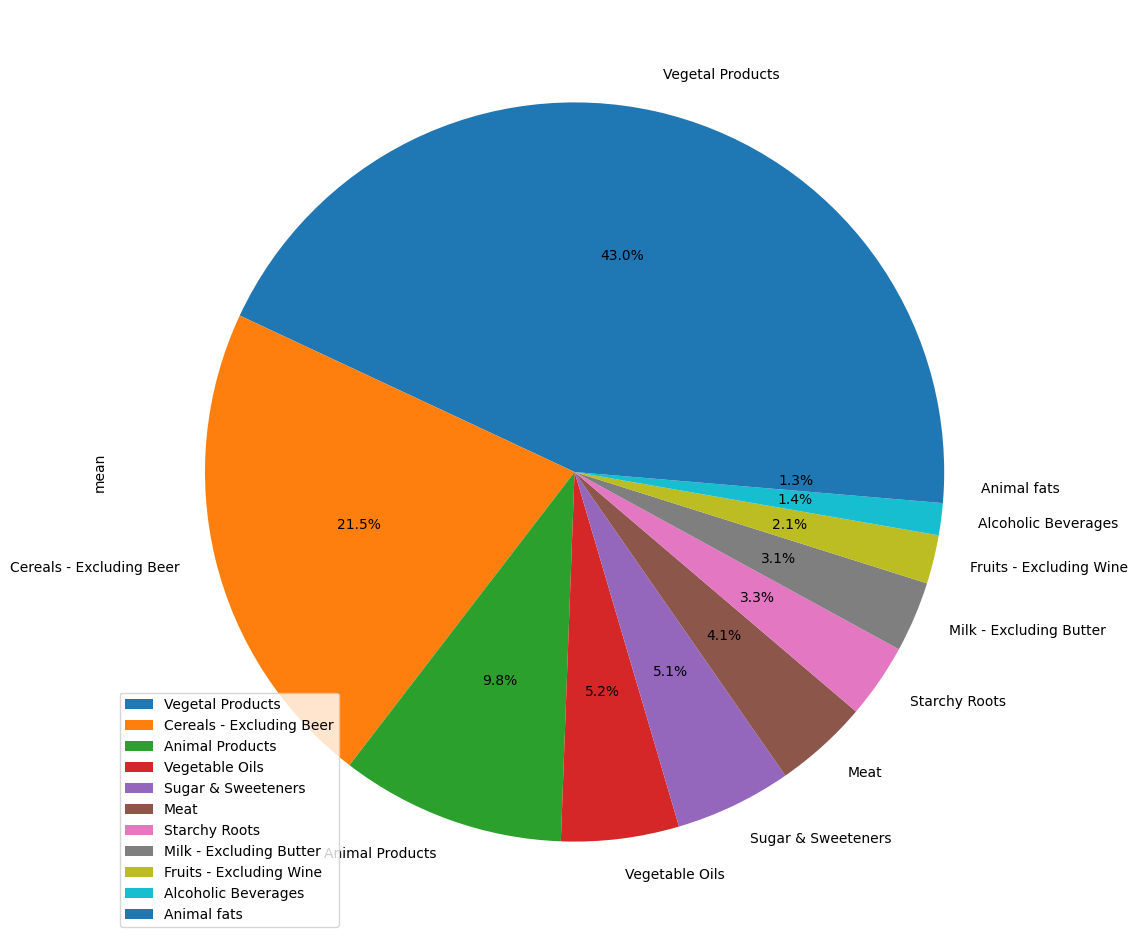

In [ ]:
# Calculate the mean intake of food sources across all countries
diet_mean = food.describe().iloc[1]  # Extract summary statistics for the mean
diet_mean = pd.DataFrame(diet_mean)  # Convert to DataFrame for easier manipulation

# Drop columns that are not relevant to food intake analysis
diet_mean = diet_mean.drop(['Deaths', 'Population', 'Undernourished', 'Obesity', 'Recovered', 'Confirmed', 'Active'], axis=0)

# Sort the food sources by mean intake in descending order and select the top 10
diet_mean = diet_mean.sort_values(by='mean', ascending=False).iloc[:11]

# Plot the top 10 food sources as a pie chart
diet_mean.plot.pie(subplots=True, figsize=(12, 12), autopct='%1.1f%%')  # Pie chart showing proportions


## Data Preparation: Splitting Countries by Obesity Rate

In this cell, we split the dataset into two subsets based on the **obesity rate** of each country:
- **High Obesity**: Countries where the **obesity rate** is above the mean.
- **Low Obesity**: Countries where the **obesity rate** is below or equal to the mean.

The subsets are created to facilitate a more detailed analysis of countries with different levels of obesity. The **high obesity** subset is then sorted by obesity rate in descending order to prioritize countries with the highest obesity rates.

### Steps:
1. **Splitting the Data**: The `high_ob` subset includes countries with an **obesity rate greater than the mean**, and the `low_ob` subset includes countries with an **obesity rate less than or equal to the mean**.
2. **Sorting**: The `high_ob` dataset is sorted by the **obesity rate** in descending order to highlight countries with the highest obesity rates at the top.

This separation will allow us to compare countries with high and low obesity rates and investigate their COVID-19 outcomes.


In [ ]:
# Split the dataset into two subsets based on the obesity rate
high_ob = food[food.Obesity > food['Obesity'].mean()]  # Countries with obesity rate higher than the mean
low_ob = food[food.Obesity <= food['Obesity'].mean()]  # Countries with obesity rate lower than or equal to the mean

# Sort the high_ob dataset by obesity rate in descending order
high_ob = high_ob.sort_values(by=['Obesity'], ascending=False)

# Display the high obesity dataset
high_ob


,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Mortality,ObesityAboveAvg
80,Kiribati,0.2290,11.9110,0.4582,0.0000,33.9986,0.2618,5.2028,3.7630,5.3664,...,1.0798,45.6,2.70000,2.021972,0.039370,1.452356,0.535158,125000.0,0.019471,1
131,Samoa,1.0420,26.8908,4.0000,0.0672,19.2268,0.3026,3.4958,7.7984,15.9664,...,0.6386,45.5,2.70000,0.001000,0.000000,0.001000,0.000000,200000.0,0.000000,1
161,United States of America,4.2746,27.2402,2.6018,0.0000,21.5584,1.5664,0.9558,3.5576,12.2130,...,1.8584,37.3,1.00000,8.159922,0.140103,0.000000,8.019819,329878000.0,0.017170,1
83,Kuwait,0.0000,18.3454,1.1612,0.0000,40.8418,2.0320,0.6096,5.0218,8.3310,...,3.4542,37.0,2.80000,3.624728,0.020550,3.434087,0.170092,4691000.0,0.005669,1
133,Saudi Arabia,0.0000,15.1800,1.5650,0.0000,46.9170,0.8138,0.6572,6.5414,6.6980,...,1.5336,35.0,7.10000,1.055795,0.018256,1.030898,0.006641,35041000.0,0.017291,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Guyana,1.1438,18.0242,0.4160,0.0000,42.5996,0.2426,1.7332,4.5060,7.3830,...,6.3778,19.2,8.10000,1.008767,0.022872,0.884625,0.101271,787000.0,0.022673,1
4,Antigua and Barbuda,4.6082,30.7344,3.0858,0.0000,27.4430,0.4114,3.4560,7.3648,14.0712,...,2.5920,19.1,10.82454,0.293878,0.007143,0.190816,0.095918,98000.0,0.024306,1
120,Peru,3.1058,11.5926,0.3612,0.0000,42.5786,1.1556,1.7696,6.9700,4.0448,...,2.2390,19.1,9.70000,3.573742,0.127751,3.310514,0.135477,32824000.0,0.035747,1
119,Paraguay,3.6504,18.7626,2.3726,0.0000,31.6482,1.5696,0.2920,2.2632,9.1622,...,1.2046,19.0,10.70000,1.896664,0.038691,1.562591,0.295382,7255000.0,0.020399,1


## Defining Food Categories

In this cell, we define two lists of features that correspond to different categories of food intake:

1. **Animal Products**:
   - These are the animal-based food products included in the dataset.
   - The `animal_features` list contains the names of various animal-based food items (e.g., **Animal fats**, **Eggs**, **Meat**, etc.).

2. **Vegetal Products**:
   - These are the plant-based food products included in the dataset.
   - The `vegetal_features` list contains the names of various plant-based food items (e.g., **Fruits**, **Vegetables**, **Cereals**, etc.).

By organizing these features into two categories, we can later analyze the relationship between animal-based and plant-based food consumption and their impact on obesity rates, COVID-19 mortality, or other health outcomes.


In [ ]:
# List of animal-based food items in the dataset
animal_features = [
    'Animal fats',            # Fat derived from animals
    'Aquatic Products, Other', # Other aquatic products excluding fish and seafood
    'Eggs',                   # Eggs (from animals)
    'Fish, Seafood',          # Fish and other seafood
    'Meat',                   # Various types of meat
    'Milk - Excluding Butter', # Milk products excluding butter
    'Offals'                  # Internal organs of animals used for food
]

# List of plant-based food items in the dataset
vegetal_features = [
    'Alcoholic Beverages',     # Alcoholic beverages
    'Cereals - Excluding Beer', # Cereals, excluding beer
    'Fruits - Excluding Wine', # Fruits excluding wine
    'Miscellaneous',           # Miscellaneous plant-based foods
    'Oilcrops',                # Plants grown for oil extraction
    'Pulses',                  # Legumes and pulses
    'Spices',                  # Spices derived from plants
    'Starchy Roots',           # Root vegetables that are starchy (e.g., potatoes)
    'Stimulants',              # Stimulants like coffee and tea
    'Sugar & Sweeteners',      # Sugar and other sweeteners
    'Sugar Crops',             # Crops grown specifically for sugar production
    'Treenuts',                # Nuts that grow on trees (e.g., almonds, walnuts)
    'Vegetable Oils',          # Oils derived from plants
    'Vegetables'               # Various types of vegetables
]


## Scatter Plots and Correlation Analysis

In this section, we are going to explore the correlation between **obesity** and various food consumption categories. Specifically, we will calculate the **Pearson correlation coefficient** between **Obesity** and several food-related features, then visualize the relationships with scatter plots. We are interested in food categories with a strong correlation (positive or negative) with obesity.

### Steps:
1. **Pearson Correlation**:
   - For each food category, the Pearson correlation coefficient with obesity will be calculated.
   - The Pearson correlation coefficient measures the linear relationship between two variables. The value ranges from -1 to 1:
     - A positive value indicates a positive correlation (i.e., as one variable increases, the other also increases).
     - A negative value indicates a negative correlation (i.e., as one variable increases, the other decreases).
     - A value close to 0 indicates no linear relationship.

2. **Scatter Plots**:
   - A scatter plot will be generated for food categories that have a **strong correlation** (greater than 0.5 or less than -0.5) with obesity.
   - Positive correlations will be shown in the default color, while negative correlations will be shown in red.

### Output:
- The scatter plots will visually represent the relationships between each food category and obesity.
- The correlation coefficient and p-value will be printed for each food feature with a significant correlation to obesity.


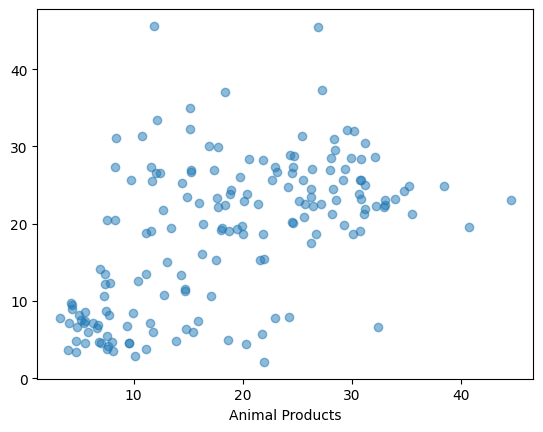

Column : Animal Products \Correlation coefficient : 0.5469 p-value : 0.0000



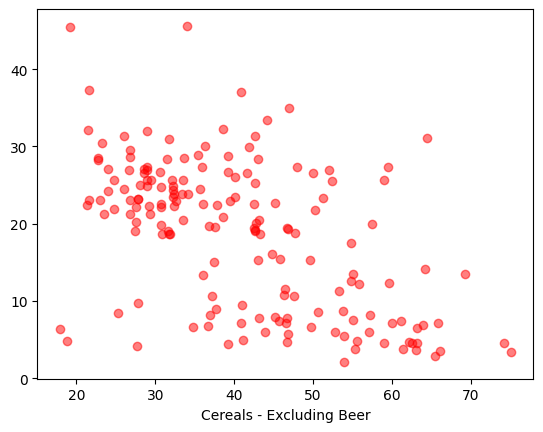

Column : Cereals - Excluding Beer \Correlation coefficient : -0.5417 p-value : 0.0000



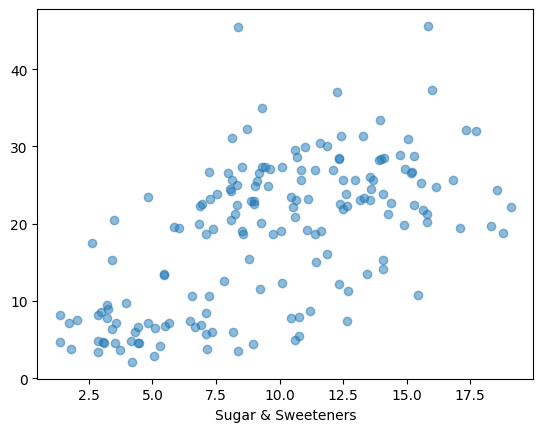

Column : Sugar & Sweeteners \Correlation coefficient : 0.6027 p-value : 0.0000



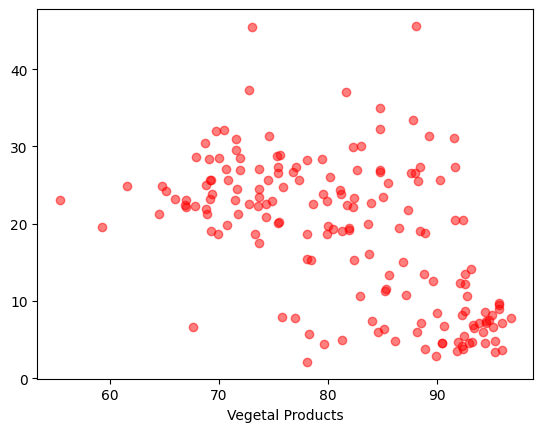

Column : Vegetal Products \Correlation coefficient : -0.5471 p-value : 0.0000



In [ ]:
# Importing necessary library for statistical analysis
import scipy.stats as stats

# Defining the list of food categories to analyze
cols = ['Alcoholic Beverages', 'Animal Products', 'Animal fats',
        'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
        'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
        'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
        'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar Crops',
        'Sugar & Sweeteners', 'Treenuts', 'Vegetal Products', 'Vegetable Oils',
        'Vegetables']

# Looping through each food category to calculate the Pearson correlation
for col in cols:
    # Calculate the Pearson correlation coefficient and p-value between the food category and obesity
    a, b = stats.pearsonr(food[col].values, food['Obesity'].values)

    # If the absolute value of the correlation coefficient is greater than 0.5, we consider it significant
    if abs(a) > 0.5:

        # Plot a scatter plot to visualize the relationship
        # Positive correlations will be shown in the default color (blue), negative in red
        if a > 0:
            plt.scatter(food[col].values, food['Obesity'].values, alpha=0.5)
        else:
            plt.scatter(food[col].values, food['Obesity'].values, alpha=0.5, c='red')

        # Label the x-axis with the food category name
        plt.xlabel(col)

        # Show the plot
        plt.show()

        # Print the correlation results: food category, correlation coefficient, and p-value
        print("Column : {:10s} \Correlation coefficient : {:.4f} p-value : {:.4f}\n".format(col, a, b))


## Scatter Plot of Undernourishment vs. Obesity

In this section, we will create a **scatter plot** to explore the relationship between **undernourishment** and **obesity** across different countries. The plot will display:
- **Undernourishment** on the x-axis.
- **Obesity** on the y-axis.
- The **Active** cases as the size of the data points.

### Additional Analysis:
- A horizontal **line** will be drawn at the **mean obesity rate** across all countries. This line will help us visually compare whether countries above or below this line tend to have different undernourishment rates.

### Steps:
1. **Scatter Plot**:
   - The size of each point represents the number of active cases of the disease in each country.
   - Hovering over each point will display the country name for easier identification.

2. **Mean Obesity Line**:
   - A red horizontal line will be added at the mean value of obesity across all countries.
   - This line serves as a threshold to visually compare countries with obesity rates above and below the average.

### Expected Outcome:
- The plot will help to visually explore any potential relationship between undernourishment and obesity in different countries.
- The horizontal line will provide a reference for determining which countries have an obesity rate above or below the average.


In [ ]:
# Importing plotly express for visualization
import plotly.express as px

# Scatter plot showing the relationship between Undernourishment and Obesity
fig = px.scatter(food, x="Undernourished", y="Obesity", size="Active", hover_name='Country',
                 log_x=False, size_max=30, template="simple_white")

# Adding a horizontal line at the mean obesity rate for all countries
fig.add_shape(
    type="line",  # Line shape
    x0=0,  # Starting point on the x-axis (minimum Undernourished value)
    y0=food['Obesity'].mean(),  # y-coordinate for the line (mean Obesity rate)
    x1=food['Undernourished'].max(),  # Ending point on the x-axis (maximum Undernourished value)
    y1=food['Obesity'].mean(),  # y-coordinate remains the same (mean Obesity rate)
    line=dict(
        color="crimson",  # Line color (red)
        width=4  # Line width
    ),
)

# Show the plot
fig.show()


## Splitting Data Based on Undernourishment

In this section, we will classify countries based on their **undernourishment levels** compared to the **mean undernourishment** across all countries.

- **High Undernourishment Countries**: Countries where the level of undernourishment is greater than the mean undernourishment across all countries.
- **Low Undernourishment Countries**: Countries where the level of undernourishment is less than or equal to the mean undernourishment.

This classification will help us explore and compare the impact of undernourishment levels on other factors like obesity, mortality, and disease prevalence.


In [ ]:
high_un = food[food.Undernourished > food['Undernourished'].mean()]
low_un = food[food.Undernourished <= food['Undernourished'].mean()]

## Pie Charts: Animal-Based Foods Consumption by Malnutrition Rates

In this section, we are comparing the consumption of animal-based foods in countries with high and low **malnutrition rates** (undernourishment levels).

- **Low Malnutrition Rates**: Countries where the undernourishment level is below or equal to the mean.
- **High Malnutrition Rates**: Countries where the undernourishment level is above the mean.

We are visualizing the average consumption of different animal-based foods in each group. The pie charts will show how the distribution of animal-based food consumption varies between these two groups of countries.


In [ ]:
# Pie chart for animal-based food consumption in countries with low undernourishment rates
fig = px.pie(values = low_un[animal_features].mean().tolist(),
             names = animal_features,
             title='Countries with low malnutrition rates - Animal-based foods')
fig.show()  # Display the pie chart

# Pie chart for animal-based food consumption in countries with high undernourishment rates
fig = px.pie(values = high_un[animal_features].mean().tolist(),
             names = animal_features,
             title='Countries with high malnutrition rates - Animal-based foods')
fig.show()  # Display the pie chart


## Pie Charts: Plant-Based Foods Consumption by Malnutrition Rates

In this section, we are comparing the consumption of plant-based foods in countries with high and low **malnutrition rates** (undernourishment levels).

- **Low Malnutrition Rates**: Countries where the undernourishment level is below or equal to the mean.
- **High Malnutrition Rates**: Countries where the undernourishment level is above the mean.

We are visualizing the average consumption of different plant-based foods in each group. The pie charts will show how the distribution of plant-based food consumption varies between these two groups of countries.


In [ ]:
# Pie chart for plant-based food consumption in countries with low undernourishment rates
fig = px.pie(values = low_un[vegetal_features].mean().tolist(),
             names = vegetal_features,
             title='Countries with low malnutrition rates - Plant-based foods')
fig.show()  # Display the pie chart for countries with low malnutrition rates

# Pie chart for plant-based food consumption in countries with high undernourishment rates
fig = px.pie(values = high_un[vegetal_features].mean().tolist(),
             names = vegetal_features,
             title='Countries with high malnutrition rates - Plant-based foods')
fig.show()  # Display the pie chart for countries with high malnutrition rates


## Pie Charts: Overall Food Consumption by Undernourishment Levels

In this section, we are analyzing the **overall consumption** of both **animal-based** and **plant-based** foods in countries with high and low **undernourishment** (nutritional deficiency) rates.

- **High Undernourishment Countries**: Countries where the rate of undernourishment is above the mean.
- **Low Undernourishment Countries**: Countries where the rate of undernourishment is below or equal to the mean.

We create pie charts to visualize the average consumption of animal-based and plant-based foods for each group of countries.


In [ ]:
# Pie chart for average animal-based food consumption in countries with high and low undernourishment rates
fig = px.pie(values = [high_un[animal_features].mean().mean(), low_un[animal_features].mean().mean()],
             names = ['High Undernourished Country', 'Low Undernourished Country'],
             title='Animal-based food consumption by country according to nutritional deficiency rates')
fig.show()  # Display the pie chart comparing animal-based food consumption

# Pie chart for average plant-based food consumption in countries with high and low undernourishment rates
fig = px.pie(values = [high_un[vegetal_features].mean().mean(), low_un[vegetal_features].mean().mean()],
             names = ['High Undernourished Country', 'Low Undernourished Country'],
             title='Plant-based food consumption by country according to nutritional deficiency rates')
fig.show()  # Display the pie chart comparing plant-based food consumption


## Scatter Plots: Pearson Correlation with Undernourishment

In this section, we are calculating the **Pearson correlation** between each of the selected food-related features and the **undernourishment** rates in different countries.

- The **Pearson correlation coefficient (r)** measures the strength and direction of the linear relationship between two variables. A value closer to **+1** indicates a strong positive correlation, while a value closer to **-1** indicates a strong negative correlation. A value around **0** indicates no linear correlation.

We will visualize the scatter plots for features with a correlation greater than **0.5** (or less than **-0.5**) and display the corresponding **correlation coefficient** and **p-value**.


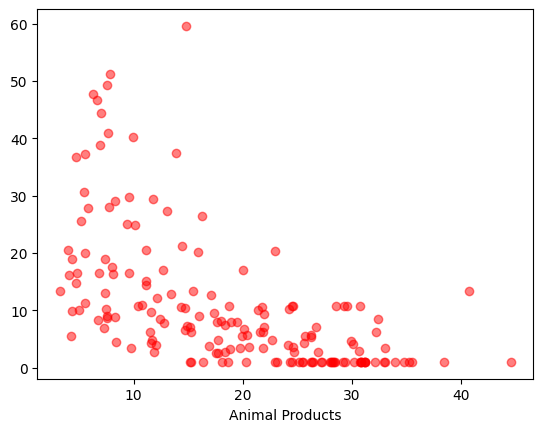

Column : Animal Products 
 correlation coefficient : -0.5879 p-value : 0.0000



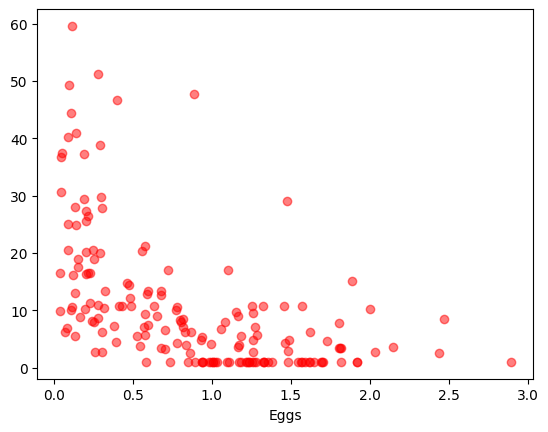

Column : Eggs       
 correlation coefficient : -0.5498 p-value : 0.0000



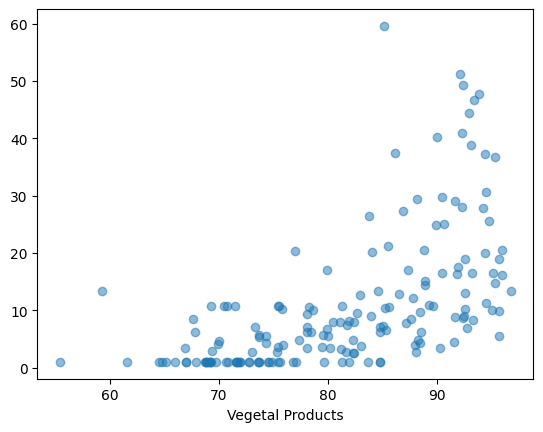

Column : Vegetal Products 
 correlation coefficient : 0.5880 p-value : 0.0000



In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# List of columns representing various food-related features
cols = ['Alcoholic Beverages', 'Animal Products', 'Animal fats',
        'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
        'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
        'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
        'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar Crops',
        'Sugar & Sweeteners', 'Treenuts', 'Vegetal Products', 'Vegetable Oils',
        'Vegetables']

# Loop through the list of food-related features (columns) and calculate the Pearson correlation with undernourishment
for col in cols:
    a, b = stats.pearsonr(food[col].values, food['Undernourished'].values)  # Calculate Pearson correlation

    # Check if the absolute value of the correlation is greater than 0.5 (either positive or negative)
    if abs(a) > 0.5:
        # If the correlation is positive, plot a scatter plot
        if a > 0:
            plt.scatter(food[col].values, food['Undernourished'].values, alpha=0.5)
        # If the correlation is negative, plot the scatter plot with red color
        else:
            plt.scatter(food[col].values, food['Undernourished'].values, alpha=0.5, c='red')

        # Label the x-axis with the current food-related feature
        plt.xlabel(col)
        plt.show()  # Display the scatter plot

        # Print the correlation coefficient and p-value for the current feature
        print("Column : {:10s} \n correlation coefficient : {:.4f} p-value : {:.4f}\n".format(col, a, b))


## Scatter Plot: Mortality vs Undernourishment

This section visualizes the relationship between **mortality rates** and **undernourishment rates** across countries.

- **X-axis:** Mortality rates (percentage of population that has died due to causes like diseases, malnutrition, etc.)
- **Y-axis:** Undernourishment rates (percentage of population that doesn't have enough food for a healthy life)
- **Size of the bubbles:** Mortality rates (used again to reflect the relative size of the country's mortality rate)

A horizontal line at the **mean undernourishment rate** is added to show the average undernourishment across all countries. This helps compare countries with above or below-average undernourishment levels.


In [ ]:
import plotly.express as px

# Create a scatter plot with 'Mortality' on the X-axis and 'Undernourished' on the Y-axis
fig = px.scatter(
    food,  # Data source: food dataframe
    x="Mortality",  # X-axis represents mortality rates
    y="Undernourished",  # Y-axis represents undernourishment rates
    size="Mortality",  # Size of the markers (bubbles) is proportional to mortality rates
    hover_name='Country',  # Hover-over information will display the country's name
    log_x=False,  # X-axis does not use a logarithmic scale
    size_max=30,  # Maximum size for the bubbles
    template="simple_white"  # Clean white background template for the chart
)

# Add a horizontal line at the mean undernourishment rate across all countries
fig.add_shape(
    type="line",  # Adding a line shape
    x0=0,  # Line starts from x = 0
    y0=food['Undernourished'].mean(),  # Y-coordinate starts at the mean undernourishment rate
    x1=food['Mortality'].max(),  # Line ends at the maximum mortality rate
    y1=food['Undernourished'].mean(),  # Y-coordinate ends at the mean undernourishment rate
    line=dict(  # Line styling
        color="crimson",  # Red color for the line
        width=4  # Line width
    ),
)

# Display the figure
fig.show()


In [ ]:
import plotly.express as px
import scipy.stats as stats

# Create a scatter plot with 'Deaths' on the X-axis and 'Undernourished' on the Y-axis
fig = px.scatter(
    food,  # Data source: food dataframe
    x="Deaths",  # X-axis represents the number of deaths
    y="Undernourished",  # Y-axis represents the undernourishment rate
    size="Mortality",  # Size of the markers (bubbles) is proportional to mortality rate
    hover_name='Country',  # Hover-over information will display the country's name
    log_x=False,  # X-axis does not use a logarithmic scale
    size_max=30,  # Maximum size for the bubbles
    template="simple_white"  # Clean white background template for the chart
)

# Add a horizontal line at the mean undernourishment rate across all countries
fig.add_shape(
    type="line",  # Adding a line shape
    x0=0,  # Line starts from x = 0
    y0=food['Undernourished'].mean(),  # Y-coordinate starts at the mean undernourishment rate
    x1=food['Deaths'].max(),  # Line ends at the maximum deaths value
    y1=food['Undernourished'].mean(),  # Y-coordinate ends at the mean undernourishment rate
    line=dict(  # Line styling
        color="crimson",  # Red color for the line
        width=4  # Line width
    ),
)

# Display the figure
fig.show()

# Calculate the Pearson correlation coefficient and p-value
a, b = stats.pearsonr(food['Deaths'].values, food['Undernourished'].values)
# Print the correlation and p-value
print("Correlation coefficient: {:.4f}  p-value: {:.4f}\n".format(a, b))


Correlation coefficient: -0.4246  p-value: 0.0000



## Sorting Countries by Obesity and Undernourishment Rates

In this section, we are identifying the countries with the highest **obesity rates** and the lowest **undernourishment rates**.

- **Obesity Top 15 Countries:** We sort the countries by their obesity rate in descending order and extract the top 15 countries with the highest obesity rates.
- **Undernourishment Bottom 15 Countries:** We sort the countries by their undernourishment rate in ascending order to identify the top 15 countries with the lowest rates of undernourishment (i.e., those with the least nutritional deficiency).

Both lists are then printed for further analysis or visualization.


In [ ]:
# Sorting countries by obesity rate in descending order and selecting the top 15 countries
country_Otop_df = food.sort_values(by = ['Obesity'], ascending = False).head(15)
# Extracting the list of country names from the top 15 highest obesity countries
country_Otop = list(country_Otop_df['Country'])
# Printing the list of top 15 countries with the highest obesity rates
print("Top 15 countries with highest obesity rates:", country_Otop)

# Sorting countries by undernourishment rate in ascending order and selecting the top 15 countries
country_Udown = list(food.sort_values(by = ['Undernourished'], ascending = True).head(15)['Country'])
# Printing the list of top 15 countries with the lowest undernourishment rates
print("Top 15 countries with lowest undernourishment rates:", country_Udown)


Top 15 countries with highest obesity rates: ['Kiribati', 'Samoa', 'United States of America', 'Kuwait', 'Saudi Arabia', 'Jordan', 'Turkey', 'Bahamas', 'New Zealand', 'Lebanon', 'Canada', 'Egypt', 'Malta', 'Australia', 'Fiji']
Top 15 countries with lowest undernourishment rates: ['Poland', 'Croatia', 'Cuba', 'Czechia', 'Denmark', 'Portugal', 'Norway', 'New Zealand', 'Finland', 'France', 'Netherlands', 'Germany', 'Greece', 'Montenegro', 'Romania']


## Finding Countries with Both High Obesity and Low Undernourishment Rates

In this section, we are identifying the countries that appear in **both** the top 15 list of **highest obesity rates** and the top 15 list of **lowest undernourishment rates**. These countries are of interest because they exhibit a paradox: they have high obesity rates, but also relatively low rates of undernourishment.

The code performs the following steps:
- **Intersection of Lists**: We take the intersection of `country_Otop` (top 15 countries with high obesity) and `country_Udown` (top 15 countries with low undernourishment) to identify the countries that are present in both lists.
- **Printing the Results**: The length of the resulting list and the list itself are printed to examine how many countries meet this criterion and to see which countries they are.


In [ ]:
# Finding the intersection of countries that are both in the top 15 obesity countries and the top 15 undernourished countries
country_df = list(set(country_Otop) & set(country_Udown))

# Printing the number of countries that meet the condition
print("Number of countries with high obesity and low undernourishment:", len(country_df))

# Printing the list of countries that meet the condition
print("Countries with both high obesity and low undernourishment:", country_df)


Number of countries with high obesity and low undernourishment: 1
Countries with both high obesity and low undernourishment: ['New Zealand']


## Identifying Countries with Highest Mortality Rates

In this section, we are extracting the top 15 countries with the highest **mortality rates**. Mortality rate is a crucial indicator of a country's overall health situation, and these countries are of particular interest.

The code performs the following:
- **Top 15 Mortality Countries**: We first sort the `food` dataset by **mortality rate** in descending order, then select the top 15 countries with the highest mortality rates.
- **Saving the Data**: The top 15 countries and their associated data are stored in `country_Mtop` (just the country names) and `country_Mtop_df` (the full data of those countries).

The next steps can involve further analysis or visualizations based on these countries.


In [ ]:
# Extracting the top 15 countries with the highest mortality rates
country_Mtop = list(food.sort_values(by = ['Mortality'], ascending = False).head(15)['Country'])

# Storing the full dataset of these top 15 countries
country_Mtop_df = food.sort_values(by = ['Mortality'], ascending = False).head(15)


In [ ]:
print(country_Mtop)

print(country_Mtop_df)

['Yemen', 'Mexico', 'Sudan', 'Ecuador', 'Egypt', 'China', 'Bolivia', 'Afghanistan', 'Liberia', 'Bulgaria', 'Mali', 'United Republic of Tanzania', 'Iran (Islamic Republic of)', 'Bosnia and Herzegovina', 'Zimbabwe']
                         Country  Alcoholic Beverages  Animal Products  \
167                        Yemen               0.0000           6.9334   
100                       Mexico               2.3920          20.5458   
143                        Sudan               0.0000          15.9474   
43                       Ecuador               1.8550          19.4782   
44                         Egypt               0.0602           8.3998   
30                         China               2.5536          32.3688   
17                       Bolivia               1.5718          20.0510   
0                    Afghanistan               0.0000           9.5548   
89                       Liberia               1.5010           5.5816   
21                      Bulgaria              

## Pie Charts for Animal-Based Food Consumption

In this section, we are visualizing the average intake of animal-based foods in the top 15 countries based on **obesity rates** and **mortality rates**.

### What the code does:
1. **Top 15 Countries with High Obesity Rates**: A pie chart is generated for the top 15 countries with the highest obesity rates. The chart visualizes the average intake of various animal-based food groups in these countries.
2. **Top 15 Countries with High Mortality Rates**: A second pie chart is generated for the top 15 countries with the highest mortality rates, showing the average intake of animal-based food groups in these countries.

These pie charts allow us to visually compare the average intake of animal-based foods between these two groups of countries.


In [ ]:
# Pie chart showing average animal-based food intake in the top 15 countries with high obesity rates
fig = px.pie(values = country_Otop_df[animal_features].mean().tolist(), names = animal_features,
             title='Top 15 countries with high obesity rates - Animal-based food groups.')
fig.show()

# Pie chart showing average animal-based food intake in the top 15 countries with high mortality rates
fig = px.pie(values = country_Mtop_df[animal_features].mean().tolist(), names = animal_features,
             title='Top 15 countries with high fatality rates - Animal-based food groups.')
fig.show()


The composition of the columns and the shapes of the graphs are very similar. Given that countries with high obesity rates and those with high COVID-19 fatality rates appear to have similar dietary trends, it can be inferred that individuals with obesity have a higher probability of increased COVID-19 fatality rates, and this may be attributed to their diets.

In [ ]:
# Pie chart showing average plant-based food intake in the top 15 countries with high obesity rates
fig = px.pie(values = country_Otop_df[vegetal_features].mean().tolist(), names = vegetal_features,
             title='Top 15 countries with high obesity rates - Plant-based food groups.')
fig.show()

# Pie chart showing average plant-based food intake in the top 15 countries with high mortality rates
fig = px.pie(values = country_Mtop_df[vegetal_features].mean().tolist(), names = vegetal_features,
             title='Top 15 countries with high fatality rates - Plant-based food groups.')
fig.show()


In [ ]:
!pip install transformers
!pip install datasets
!pip install torch

import pandas as pd
import numpy as np
import torch
from transformers import T5ForConditionalGeneration, T5Tokenizer
from sklearn.model_selection import train_test_split
from datasets import Dataset


In [ ]:
# Load the dataset
# url = 'https://raw.githubusercontent.com/datasets/covid19-healthy-diet/main/covid19-healthy-diet-dataset.csv'
path = '../content/drive/My Drive/Colab Notebooks/covid19-healthy-diet-dataset/'

df = pd.read_csv(path+'Food_Supply_kcal_Data.csv').drop(['Unit (all except Population)'], axis = 1)
# df = pd.read_csv(url)

# Inspect the dataset
df.head()


,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
0,Afghanistan,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,...,45.2476,2.3012,0.7504,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0
1,Albania,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,...,33.9070,2.8244,2.7508,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0
2,Algeria,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,...,43.9749,5.7638,2.0457,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0
3,Angola,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,...,45.3184,4.2741,0.3525,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0
4,Antigua and Barbuda,2.3041,15.3672,1.5429,0.0,13.7215,0.2057,1.7280,3.6824,7.0356,...,34.6225,4.6904,1.2960,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0


In [ ]:
df["Undernourished"].unique()

array(['29.8', '6.2', '3.9', '25', nan, '4.6', '4.3', '<2.5', '14.7',
       '7.5', '10.1', '17.1', '26.4', '3.6', '20', '12.6', '16.4', '9.9',
       '59.6', '37.5', '2.7', '8.5', '4.8', '40.3', '19', '5.6', '18.9',
       '9.5', '7.9', '4.5', '9', '2.9', '20.6', '3.7', '4.2', '10.5',
       '10.2', '5.5', '15.2', '16.5', '28', '8.1', '49.3', '12.9', '14.5',
       '8.3', '4.9', '29', '8', '12.2', '29.4', '47.8', '2.8', '7.1',
       '11', '13.1', '37.2', '44.4', '17.5', '2.5', '10.3', '6.3', '10.4',
       '6.5', '13.4', '3.4', '27.9', '10.6', '27.3', '8.7', '17', '3.2',
       '6.8', '20.3', '10', '10.7', '9.7', '13.3', '36.8', '5.7', '7',
       '11.3', '25.6', '8.9', '20.1', '3.5', '7.8', '24.9', '16.1', '5.4',
       '41', '2.6', '30.7', '7.2', '21.2', '9.3', '38.9', '46.7', '51.3'],
      dtype=object)

In [ ]:
df['Undernourished'] = df['Undernourished'].map(lambda x: '1.0' if x == '<2.5' else x).astype('float64')
print(df.isnull().sum())


Country                     0
Alcoholic Beverages         0
Animal Products             0
Animal fats                 0
Aquatic Products, Other     0
Cereals - Excluding Beer    0
Eggs                        0
Fish, Seafood               0
Fruits - Excluding Wine     0
Meat                        0
Milk - Excluding Butter     0
Miscellaneous               0
Offals                      0
Oilcrops                    0
Pulses                      0
Spices                      0
Starchy Roots               0
Stimulants                  0
Sugar Crops                 0
Sugar & Sweeteners          0
Treenuts                    0
Vegetal Products            0
Vegetable Oils              0
Vegetables                  0
Obesity                     3
Undernourished              7
Confirmed                   6
Deaths                      6
Recovered                   6
Active                      8
Population                  0
dtype: int64


In [ ]:
for col in mis_col:
    df[col] = df[col].fillna(df[col].mean())
print(df.isnull().sum())

Country                     0
Alcoholic Beverages         0
Animal Products             0
Animal fats                 0
Aquatic Products, Other     0
Cereals - Excluding Beer    0
Eggs                        0
Fish, Seafood               0
Fruits - Excluding Wine     0
Meat                        0
Milk - Excluding Butter     0
Miscellaneous               0
Offals                      0
Oilcrops                    0
Pulses                      0
Spices                      0
Starchy Roots               0
Stimulants                  0
Sugar Crops                 0
Sugar & Sweeteners          0
Treenuts                    0
Vegetal Products            0
Vegetable Oils              0
Vegetables                  0
Obesity                     0
Undernourished              0
Confirmed                   0
Deaths                      0
Recovered                   0
Active                      0
Population                  0
dtype: int64


In [ ]:
# # Select relevant features
diet_data = df[['Country', 'Alcoholic Beverages', 'Animal fats', 'Animal Products', 'Aquatic Products, Other',
                 'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
                'Milk - Excluding Butter', 'Vegetables', 'Vegetable Oils', 'Obesity', 'Undernourished',
                'Confirmed', 'Deaths', 'Recovered', 'Active', 'Population']]

# # Handle missing values (if any) and normalize if necessary
#diet_data = diet_data.fillna(diet_data.mean())

# Create input text format for fine-tuning (convert numerical columns to strings)
diet_data['input_text'] = 'Country: ' + diet_data['Country'] + \
                          ', Alcoholic Beverages: ' + diet_data['Alcoholic Beverages'].astype(str) + \
                          ', Meat: ' + diet_data['Meat'].astype(str) + \
                          ', Vegetables: ' + diet_data['Vegetables'].astype(str) + \
                          ', Obesity Rate: ' + diet_data['Obesity'].astype(str) + \
                          ', COVID-19 Confirmed Cases: ' + diet_data['Confirmed'].astype(str) + \
                          ', Active Cases: ' + diet_data['Active'].astype(str)

# Create output (diet recommendation text based on features, convert numerical columns to strings)
diet_data['output_text'] = 'Recommended diet: ' + \
                           diet_data['Meat'].astype(str) + ' grams of meat, ' + \
                           diet_data['Vegetables'].astype(str) + ' grams of vegetables, ' + \
                           'considering current active cases of ' + diet_data['Active'].astype(str) + '.'


In [ ]:
# Split data into training and validation sets
train_data, val_data = train_test_split(diet_data, test_size=0.2)

# Convert to Hugging Face Dataset format
train_dataset = Dataset.from_pandas(train_data[['input_text', 'output_text']])
val_dataset = Dataset.from_pandas(val_data[['input_text', 'output_text']])


In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, AdamW
from torch.utils.data import DataLoader
import torch

# Load tokenizer and model
tokenizer = T5Tokenizer.from_pretrained("t5-base")
model = T5ForConditionalGeneration.from_pretrained("t5-base")

# Preprocess data
def preprocess_data(examples):
    global tokenizer
    inputs = examples['input_text']
    outputs = examples['output_text']

    # Tokenize inputs and outputs
    model_inputs = tokenizer(inputs, max_length=128, truncation=True, padding='max_length')
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(outputs, max_length=128, truncation=True, padding='max_length')

    # Replace padding tokens in labels with -100
    labels['input_ids'] = [
        [-100 if token == tokenizer.pad_token_id else token for token in label]
        for label in labels['input_ids']
    ]
    model_inputs['labels'] = labels['input_ids']

    # Convert to tensors
    return {k: torch.tensor(v) for k, v in model_inputs.items()}

# Apply preprocessing to the datasets
train_dataset = train_dataset.map(preprocess_data, batched=True)
val_dataset = val_dataset.map(preprocess_data, batched=True)

# Create DataLoaders
train_dataloader = DataLoader(
    train_dataset,
    shuffle=True,
    batch_size=8,
    collate_fn=lambda x: {k: torch.stack([torch.tensor(d[k]) for d in x]) for k in ['input_ids', 'attention_mask', 'labels']}
)
val_dataloader = DataLoader(
    val_dataset,
    batch_size=8,
    collate_fn=lambda x: {k: torch.stack([torch.tensor(d[k]) for d in x]) for k in ['input_ids', 'attention_mask', 'labels']}
)

# Set up optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Training Loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(3):  # Train for 3 epochs
    model.train()
    total_loss = 0
    for batch in train_dataloader:
        # Move tensors to the device
        batch = {k: v.to(device) for k, v in batch.items()}

        # Forward pass
        outputs = model(**batch)
        loss = outputs.loss
        total_loss += loss.item()

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(train_dataloader)
    print(f'Epoch {epoch + 1} average loss: {avg_loss:.4f}')

# Save the fine-tuned model and tokenizer
model.save_pretrained('./fine_tuned_diet_model')
tokenizer.save_pretrained('./fine_tuned_diet_model')

Map:   0%|          | 0/136 [00:00<?, ? examples/s]

Map:   0%|          | 0/34 [00:00<?, ? examples/s]

Epoch 1 average loss: 1.4132
Epoch 2 average loss: 0.2786
Epoch 3 average loss: 0.1187


('./fine_tuned_diet_model/tokenizer_config.json',
 './fine_tuned_diet_model/special_tokens_map.json',
 './fine_tuned_diet_model/spiece.model',
 './fine_tuned_diet_model/added_tokens.json')

In [ ]:
# Function to generate diet plan
def generate_diet_plan(patient_data):
    input_text = f"Patient: {patient_data['name']}, Symptoms: {patient_data['symptoms']}, Age: {patient_data['age']}, Restrictions: {patient_data['restrictions']}"
    input_ids = tokenizer.encode(input_text, return_tensors='pt').to(device)

    output_ids = model.generate(input_ids, max_length=128)
    plan = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    return plan

# Example patient data
patient_data = {
    'name': 'John Doe',
    'symptoms': 'cough, fever',
    'age': 45,
    'restrictions': 'vegetarian'
}

# Generate diet plan
diet_plan = generate_diet_plan(patient_data)
print(diet_plan)


Patient: John Doe, age: 45, symptomatics: fever, cough, age: 45, dietary restrictions: vegetarian, dietary restrictions: no restrictions.
